<a href="https://colab.research.google.com/github/ankitm-ds/projects/blob/main/DHL_Supply_Chain_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DHL Supply Chain

A 2009 World Economic Forum publication declared, “Human activity generates annual greenhouse gas
emissions of around 50,000 mega-tonnes CO2 (Carbon Dioxide emission). We estimate that 2,800
megatonnes or 5.5 per cent of the total are contributed by the logistics and transport sector.

The executive summary stated, “Significant movement is expected towards reduced supply chain carbon
intensity. This will create both opportunities and risks for logistics and transport firms, with changes in
supply and demand driven by regulation of carbon emissions, higher and more volatile fuel prices and
evolving consumer and client demand. The sector can play an influential role in decarbonization, both in
its own operations and through broader supply chain optimization. This provides direct benefits through
reduced costs, managed risks and business growth.”

It concluded with several recommendations for supply chain stakeholders. Among the six
recommendations for logistics and transport providers was to “switch (transport) modes where possible.”
For shippers and buyers, it was recommended to “plan to allow slower and better optimized transport.”
Finally, policy makers were also invited to “reflect the cost of carbon in energy tariffs; support carbon
measurement and labeling standards and build open carbon trading systems.”


**COMPANY INFORMATION**

After reading the report, Yee Hwai, a member of the solutions team at DHL Supply Chain, recognized the
very findings he had uncovered in a recent simulation analysis, undertaken as part of the Go Green
environmental protection program initiated by parent firm, Deutsche Post DHL. As the thought leader on
sustainability in the industry, Deutsche Post DHL recognized there were clear opportunities to begin
resolving the carbon emission problems faced by many of its customers. DHL even stated on its website,
“We recognize environmental protection as our responsibility as well as a business opportunity.”3
Deutsche Post DHL was the first logistics company to set a quantified carbon efficiency goal — to
improve its CO2 efficiency across global operations by 30 per cent compared to the 2007 baseline.


**THE PROBLEM**

The simulation exercise Hwai undertook pertained to a consumer electronics company (CEC). Prominent
among its line of products were 32” and 42” LCD TV sets (LCD32” and LCD42”). Production of the
LCD TV sets was subcontracted to various original design manufacturers (ODMs) located in China and
Taiwan. 

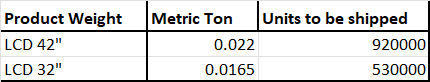

The responsibility of DHL Supply Chain was to ship the LCD TV sets from the ODMs to the
distribution centre (DC) located in Shanghai. In the latest contract, the CEC had allocated a budget of
CNY 3 billion (Chinese renminbi) for the production and shipping of 920,000 units of LCD42” and
530,000 units of LCD32” TV sets to its DC. Hwai had worked with the CEC to configure the optimal
supply chain that would fulfill this order within the CNY 3 billion budget while satisfying various
constraints pertaining to economy of scale, production capacity, supplier risk management and service
level requirements on the shipping front. At that point, this optimization exercise did not consider the
volume of CO2 emissions

The CEC had a list of seven ODMs to which it could subcontract the production of LCD TV sets
according to their availability and prices. ODM1 and ODM2 were the only companies that could produce
both LCD32” and LCD42”. The remaining five ODMs produced LCD42” exclusively. Their unit
production costs are listed in the data sheet. 

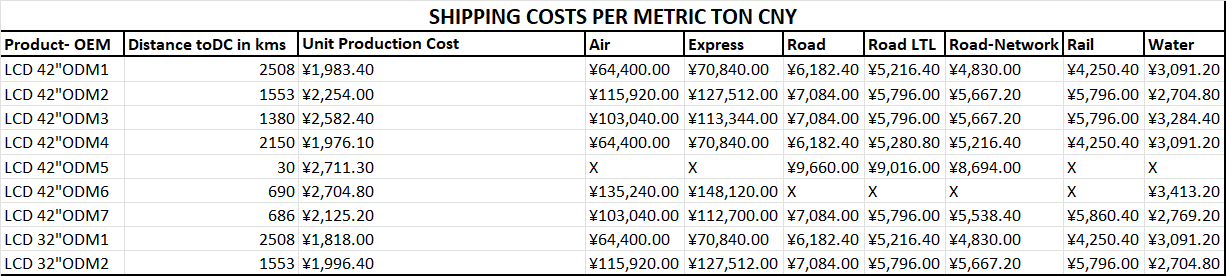

To engender economies of scale in the production, the CEC guaranteed a minimum order of 200,000 to any selected ODMs. Also, to mitigate
dependency risk on any ODM, the maximum order for either LCD32” or LCD42” was capped at 600,000
units. ODM1 and ODM2 had high production capacities and, if chosen, they each had the ability to
produce 600,000 units of LCD32”, as well as 600,000 units of LCD42”.

Several transportation modes were available to ship the TV sets from the ODMs to the DC: regular air, air
express, road, road LTL (less than truckload), road network, rail and water. The distances from the ODMs
to the DC and the various shipping rates are tabulated in the data sheet. ODM5 was located near the DC,
restricting shipping to road, road LTL and road network. ODM6 was located in Taiwan and shipping
could only be conducted via air or water. Across shipping modes, the rates of carbon emission  varied greatly from as high as 1.44 (regular air or air express) to 0.007 (water)
kilogram (kg) per ton shipped per kilometer (km) travelled. Each LCD32” weighed about 16.5 kgs and
each LCD42” weighed about 22 kgs.

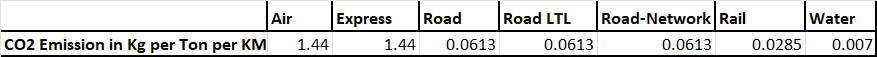

Shipping times varied from two days (via air express) to 10 days (via water). Based on historical
information on shipping times and customer order cycle times, the CEC decided that to maintain
satisfactory inventory levels, DHL Supply Chain had to ship a minimum number of 32” and 42” LCD TV
sets, according to the criteria listed at the bottom of the data sheet below  There was no
constraint on shipments via water.

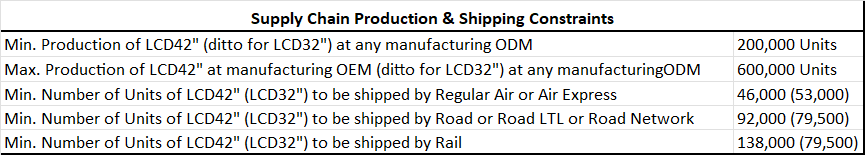

In the simulation exercise, Hwai assumed a likely consequence of government legislation to reduce the
emission of CO2 would appear in the form of a tax incentive. He also anticipated the brand value of the
LCD TV sets could rise as a result of customer awareness. Hwai estimated these factors could translate
into a 10 per cent increase in the budget for this specific supply chain. He was eager to find out the
potential reduction in CO2 emission made possible through a potential CNY 4 billion budget for
manufacturing and shipping the TVs from the ODMs to the DC.



# **Linear Programming Optimization Problem Formulation**

**Installing  Necessary Library**

In [ ]:
pip install pulp #  linear programming API for solving optimaztion problem


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 63.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pulp import *
import numpy as np


# **Objective**

Find out the
potential reduction in CO2 emission made possible through a potential CNY 3.3 billion budget for
manufacturing and shipping the TVs from the ODMs to the DC.



# **Decision Variables**
 

P = Number of Units to be manufactured of particular Product in particular ODM and shipped to the DC through particular transportation modes.



***Sets***

Product - **"p"** {LCD 42" - 1 , LCD 32" - 2}

ODM - **"s"** - {ODM1 - 1 , ODM2 - 2 , ODM3 - 3 , ODM4 - 4 , ODM5 -5 , ODM6 - 6 , ODM7 - 7}

Transportation Modes - **"t"** - {Air - 1 , Express - 2 , Road - 3 , Road LTL - 4 , Road-Network -5 , Rail - 6 , Water - 7}




**Decision Variables -** 

**P**p,s,t with `p E [1,2,]` , `s E [1,2,3,4,5,6,7] ` AND `t E [1,2,3,4,5,6,7] `


# **Contraints**


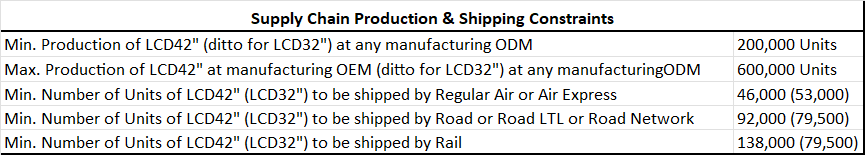

In [ ]:
# Create the model
model = LpProblem(name="Supply Chain Optimaztion to minimize CO2 emissions", sense=LpMinimize)


# Define the decision variables
P = LpVariable.dicts("Unit Produced", [(p+1,s+1,t+1) for p in range(2) for s in range(7) for t in range(7)],lowBound=0, upBound=None, cat='Integer') 

for p in [1]:
  for s in [2,3,4,5,6]:
    for t in range(7):
      P[p+1,s+1,t+1]   = 0


for p in [0]:
  for s in [4]:
    for t in [0,1,5,6]:
      P[p+1,s+1,t+1]   = 0

for p in [0]:
  for s in [5]:
    for t in [2,3,4,5]:
      P[p+1,s+1,t+1]   = 0      
#Budget
B=4000000000
#Min Quantity in ODM
QMI=200000 
#Max Quantity in ODM
QMX=600000


CO = {1: 1.44, 2: 1.44, 3: 0.0613, 4: 0.0613, 5: 0.0613, 6: 0.0285, 7: 0.007}
W = {1: 0.022, 2: 0.0165}
D = {1: 920000, 2: 530000} 
DI ={1:{1:2508,2:1553,3:1380, 4:2150,5:30,6:690,7:686},
     2:{1:2508,2:1553,3:1000000000, 4:1000000000,5:1000000000,6:1000000000,7:1000000000}
     }

# PRODUCTION COST PER PRODUCT BY EACH DOM
PC = {}  

for x,y in zip(range(2) ,  [[1983.40 ,2254.00,2582.40,1976.10,2711.30,2704.80,2125.20],[1818.00,1996.40,1000000000,1000000000,1000000000,1000000000,1000000000]]):
     PC[x+1] = [y[e] for e in range(7)]
PC = pd.DataFrame(PC,index=[x+1 for x in range(7) ]).T

SC = {
    1 : {
        1: {1: 64400	,2: 	70840	,3: 	6182.4	, 4:	5216.4	,	 5:4830	,	6:4250.4	,7:	3091.2},
        2: {1: 115920	,	2: 127512	,	3:7084	,	 4:5796	,	 5:5667.2	,	6:5796	,	7:2704.8},
        3: {1: 103040	,	2: 113344	,	3:7084	,	 4:5796	,	 5:5667.2	,6:	5796	,	7:3284.4},
        4: {1: 64400	,2:	70840	,	3:6182.4	,	 4:5280.8	,	 5:5216.4	,	6:4250.4	,	7:3091.2},
        5: {1: 1000000000,2: 1000000000	,	3:9660	,	 4:9016	,	 5:8694	,	6:1000000000,7:1000000000},
        6: {1: 135240	,	2: 148120	,	3:999999, 4:999999,	 5:999999,6:999999	,	7:3413.2},
        7: {1: 103040	,	2:112700	,	3:7084	,	 4:5796	,	 5:5538.4	,	6:5860.4	,7:	2769.2}
    },
    2 : {
        1: {1: 64400	,	2:70840	,3:	6182.4	,	 4:5216.4	,	 5:4830	,	6:4250.4	,	7:3091.2},
        2: {1: 115920	,2:	127512	,	3:7084	,	 4:5796	,	 5:5667.2	,6:5796	,	7:2704.8},
        3: {1: 1000000000,2:1000000000	,	3:1000000000, 4:1000000000,	 5:1000000000	,	6:1000000000,7:1000000000},
        4: {1: 1000000000,2:1000000000	,	3:1000000000, 4:1000000000,	 5:1000000000	,	6:1000000000,7:1000000000},
        5: {1: 1000000000,2:1000000000	,	3:1000000000, 4:1000000000,	 5:1000000000	,	6:1000000000,7:1000000000},
        6: {1: 1000000000,2:1000000000	,	3:1000000000, 4:1000000000,	 5:1000000000	,	6:1000000000,7:1000000000},
        7:{1: 1000000000,2:1000000000	,	3: 1000000000, 4:1000000000, 5:	1000000000	,	6:1000000000,7:1000000000}
    }


} 



T = {}  
for x,y in zip(range(2) ,  [[46000	,	92000	,		138000	],[53000		,	79500		,	79500	]]):
     T[x+1] = [y[e] for e in range(3)]
T = pd.DataFrame(T,index=[x+1 for x in range(3) ]).T



# Ojective Function - minimize CO emission
model += lpSum(  
    P[p+1,s+1,t+1] * W[p+1]  * CO[t+1] * DI[p+1][s+1] for p in range(2) for s in range(7) for t in range(7)  )



#Contraints


# demand

for p in range(2) :
  model += lpSum(P[p+1,s+1,t+1] for s in range(7) for t in range(7) ) >= D[p+1]

# supply capacity

# MIN CAPACITY
for s in range(7):
  model += lpSum([P[p+1,s+1,t+1] for p in range(2) for t in range(7)] ) >= QMI


# MAX CAPACITY
for s in range(7):
  model += lpSum([P[p+1,s+1,t+1] for p in range(2) for t in range(7)] ) <= QMX  

#BUDGET

model += lpSum( [ ( P[p+1,s+1,t+1]  * ( PC.loc[p+1,s+1]   +  (   SC[p+1][s+1][t+1]   *  W[p+1] ) )  )  \
                   for p in range(2) for s in range(7) for t in range(7) ] ) <= B 


# shipping

#  to be shipped by Regular Air or Air Express
for p in range(2):
    model += lpSum( [P[p+1,s+1,t+1] for s in range(7) for t in [0,1] ]  ) >= T.loc[p+1,1]  

#  to be shipped by Road or Road LTL or Road Network
for p in range(2):
    model += lpSum( [P[p+1,s+1,t+1] for s in range(7) for t in [2,3,4] ]  ) >= T.loc[p+1,2] 


#  to be shipped by Rail
for p in range(2):
    model += lpSum( [P[p+1,s+1,t+1] for s in range(7) for t in [5] ]  ) >= T.loc[p+1,3] 

model.solve()
print("Solution Status",LpStatus[model.status])


Solution Status Optimal


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
for v in model.variables():
    print(v.name ,  "=" ,v.varValue)


Unit_Produced_(1,_1,_1) = 0.0
Unit_Produced_(1,_1,_2) = 0.0
Unit_Produced_(1,_1,_3) = 0.0
Unit_Produced_(1,_1,_4) = 0.0
Unit_Produced_(1,_1,_5) = 0.0
Unit_Produced_(1,_1,_6) = 0.0
Unit_Produced_(1,_1,_7) = 0.0
Unit_Produced_(1,_2,_1) = 0.0
Unit_Produced_(1,_2,_2) = 0.0
Unit_Produced_(1,_2,_3) = 0.0
Unit_Produced_(1,_2,_4) = 0.0
Unit_Produced_(1,_2,_5) = 0.0
Unit_Produced_(1,_2,_6) = 0.0
Unit_Produced_(1,_2,_7) = 0.0
Unit_Produced_(1,_3,_1) = 0.0
Unit_Produced_(1,_3,_2) = 0.0
Unit_Produced_(1,_3,_3) = 0.0
Unit_Produced_(1,_3,_4) = 0.0
Unit_Produced_(1,_3,_5) = 0.0
Unit_Produced_(1,_3,_6) = 0.0
Unit_Produced_(1,_3,_7) = 200000.0
Unit_Produced_(1,_4,_1) = 0.0
Unit_Produced_(1,_4,_2) = 0.0
Unit_Produced_(1,_4,_3) = 0.0
Unit_Produced_(1,_4,_4) = 0.0
Unit_Produced_(1,_4,_5) = 0.0
Unit_Produced_(1,_4,_6) = 0.0
Unit_Produced_(1,_4,_7) = 200000.0
Unit_Produced_(1,_5,_3) = 200000.0
Unit_Produced_(1,_5,_4) = 0.0
Unit_Produced_(1,_5,_5) = 0.0
Unit_Produced_(1,_6,_1) = 0.0
Unit_Produced_(1,_6,_2) =

In [ ]:
print("Objective: z* = {}".format(value(model.objective)))

Objective: z* = 3416507.1649499997


# **Solution**

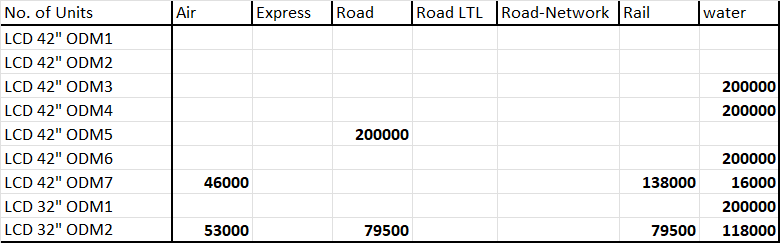

With given budget of CNY 4 billion, we can reduce  CO2 emissions to 3416.50 metric ton (3416507.16 Kg) by manufacturing LCD 42" in ODM3,ODM4,ODM5,ODM6, ODM7 AND LCD 32" in ODM1, ODM2 shipped through mostly Water.



